# Aprendizaje Automático
## La fórmula secreta

1. Importe el dataset de data/recetas_muffins_cupcakes_scones.csv (puede agregar más datos si lo desea y compartirlos con sus compañeros; los números representan el volumen en cm³, normalizado a 100 cm³ por receta)

In [ ]:
import pandas as pd

# Lee el archivo CSV con los datos
archivo_csv = 'data/recetas_muffins_cupcakes_scones.csv' 
datos = pd.read_csv(archivo_csv)

2. En un gráfico azúcar vs manteca, muestre los puntos del dataset de entrenamiento, con distintos colores para cada clase.


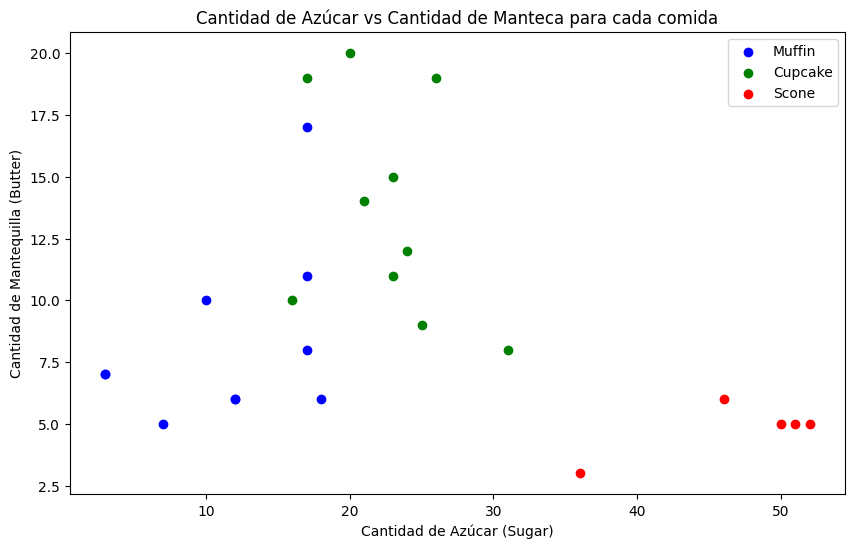

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
archivo_csv = 'data/recetas_muffins_cupcakes_scones.csv' 
datos = pd.read_csv(archivo_csv)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))

# Colores para cada tipo
colores = {'Muffin': 'blue', 'Cupcake': 'green', 'Scone': 'red'}

# Graficar cada tipo con un color diferente
for tipo in datos['Type'].unique():
    subset = datos[datos['Type'] == tipo]
    plt.scatter(subset['Sugar'], subset['Butter'], label=tipo, color=colores[tipo])

# Añadir etiquetas y título
plt.xlabel('Cantidad de Azúcar (Sugar)')
plt.ylabel('Cantidad de Mantequilla (Butter)')
plt.title('Cantidad de Azúcar vs Cantidad de Manteca para cada comida')
plt.legend()

# Mostrar el gráfico
plt.show()


3. Separe los datos en train y validation (80%/20%)


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Leer el archivo CSV
datos = pd.read_csv(archivo_csv)

# Dividir los datos en conjuntos de entrenamiento y validación (80% entrenamiento, 20% validación)
train_df, validation_df = train_test_split(datos, test_size=0.2, random_state=42)

# Para chequear ambos sets
print(f"Tamaño del conjunto de entrenamiento: {len(train_df)}")
print(f"Tamaño del conjunto de validación: {len(validation_df)}")
print("\nConjunto de Entrenamiento:")
print(train_df)
print("\nConjunto de validación:")
print(validation_df)


Tamaño del conjunto de entrenamiento: 20
Tamaño del conjunto de validación: 5

Conjunto de Entrenamiento:
       Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
9    Muffin     50    17     17      11    4              1        0     0
13  Cupcake     39    13     17      19   10              1        1     0
1    Muffin     47    24     12       6    9              1        0     0
22    Scone     20     5     52       5   10              3        0     5
5    Muffin     55    27      3       7    5              2        1     0
2    Muffin     47    23     18       6    4              1        0     0
12  Cupcake     34    17     20      20    5              2        1     0
15  Cupcake     42    18     25       9    5              1        0     0
3    Muffin     45    11     17      17    8              1        0     0
4    Muffin     50    25     12       6    5              2        1     0
20    Scone     29     3     46       6    0             11        0 

4. Entrene un modelo que prediga si es un muffin, cupcake o scone.


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Leer el archivo CSV
archivo_csv = 'data/recetas_muffins_cupcakes_scones.csv' 
datos = pd.read_csv(archivo_csv)

# Dividir los datos en conjunto de entrenamiento y conjunto de validación (80% entrenamiento, 20% validación)
train_df, validation_df = train_test_split(datos, test_size=0.2, random_state=42, stratify=datos['Type'])

# Separar características y etiquetas
X_train = train_df.drop('Type', axis=1)
y_train = train_df['Type']
X_validation = validation_df.drop('Type', axis=1)
y_validation = validation_df['Type']

# Crear y entrenar el modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred = clf.predict(X_validation)

# Evaluar el modelo
accuracy = accuracy_score(y_validation, y_pred)
report = classification_report(y_validation, y_pred)

print(f"Precisión del modelo: {accuracy}")
print("Reporte de clasificación:")
print(report)
print("Y el set de validación era: ")
print(validation_df)


Precisión del modelo: 1.0
Reporte de clasificación:
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         2
      Muffin       1.00      1.00      1.00         2
       Scone       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Y el set de validación era: 
       Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
24    Scone     19    10     51       5    0             10        0     5
2    Muffin     47    23     18       6    4              1        0     0
16  Cupcake     36    14     21      14   11              2        1     0
6    Muffin     54    27      7       5    5              2        0     0
13  Cupcake     39    13     17      19   10              1        1     0


5. Informe la accuracy del modelo en el dataset de entrenamiento y el de validación


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Leer el archivo CSV
archivo_csv = 'data/recetas_muffins_cupcakes_scones.csv'  
datos = pd.read_csv(archivo_csv)

# Dividir los datos en conjunto de entrenamiento y conjunto de validación (80% entrenamiento, 20% validación)
train_df, validation_df = train_test_split(datos, test_size=0.2, random_state=42, stratify=datos['Type'])

# Separar características y etiquetas
X_train = train_df.drop('Type', axis=1)
y_train = train_df['Type']
X_validation = validation_df.drop('Type', axis=1)
y_validation = validation_df['Type']

# Crear y entrenar el modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred_validation = clf.predict(X_validation)
# Hacer predicciones en el conjunto de entrenamiento
y_pred_train = clf.predict(X_train)

# Evaluar el modelo en el conjunto de validación
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
report_validation = classification_report(y_validation, y_pred_validation)

# Evaluar el modelo en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)

print("Resultados en el conjunto de validación:")
print(f"Precisión del modelo: {accuracy_validation}")
print("Reporte de clasificación:")
print(report_validation)

print("\nResultados en el conjunto de entrenamiento:")
print(f"Precisión del modelo: {accuracy_train}")
print("Reporte de clasificación:")
print(report_train)


Resultados en el conjunto de validación:
Precisión del modelo: 1.0
Reporte de clasificación:
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         2
      Muffin       1.00      1.00      1.00         2
       Scone       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Resultados en el conjunto de entrenamiento:
Precisión del modelo: 1.0
Reporte de clasificación:
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         8
      Muffin       1.00      1.00      1.00         8
       Scone       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



6. Testee su modelo con el test set propocionado


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Leer el archivo CSV
archivo_csv = 'data/recetas_muffins_cupcakes_scones.csv'  # Reemplaza con la ruta real de tu archivo
datos = pd.read_csv(archivo_csv)

# Dividir los datos en conjunto de entrenamiento y conjunto de validación (80% entrenamiento, 20% validación)
train_df, validation_df = train_test_split(datos, test_size=0.2, random_state=42, stratify=datos['Type'])

# Separar características y etiquetas
X_train = train_df.drop('Type', axis=1)
y_train = train_df['Type']
X_validation = validation_df.drop('Type', axis=1)
y_validation = validation_df['Type']

# Crear y entrenar el modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Crear el DataFrame con los nuevos datos de test propocionados
nuevos_datos = pd.DataFrame({
    'Flour': [50, 42, 25],
    'Milk': [16, 7, 6],
    'Sugar': [19, 17, 45],
    'Butter': [8, 16, 4],
    'Egg': [6, 15, 10],
    'Baking Powder': [0, 1, 7],
    'Vanilla': [0, 1, 0],
    'Salt': [1, 0, 3]
})

# Hacer predicciones en los nuevos datos
y_pred_nuevos = clf.predict(nuevos_datos)

# Mostrar las predicciones
print("\nPredicciones para los nuevos datos:")
for i, pred in enumerate(y_pred_nuevos):
    print(f"La receta {i+1} corresponde a un: {pred}")



Predicciones para los nuevos datos:
La receta 1 corresponde a un: Muffin
La receta 2 corresponde a un: Cupcake
La receta 3 corresponde a un: Scone


7. En un gráfico azúcar vs manteca, muestre las predicciones sobre el dataset de entrenamiento y el de testeo con distintos marcadores e indique con colores la clase que predice su modelo.


/usr/local/lib/python3.11/site-packages/seaborn/relational.py:432: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


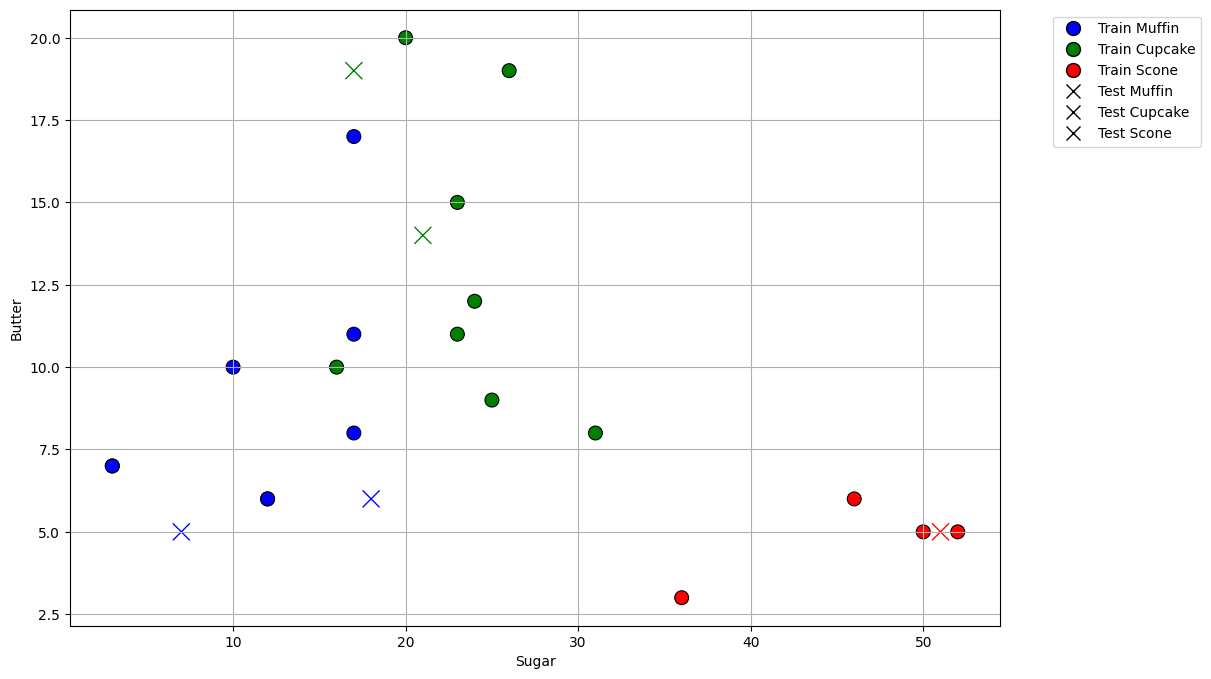

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV
archivo_csv = 'data/recetas_muffins_cupcakes_scones.csv' 
datos = pd.read_csv(archivo_csv)

# Dividir los datos en conjunto de entrenamiento y conjunto de validación (80% entrenamiento, 20% validación)
train_df, validation_df = train_test_split(datos, test_size=0.2, random_state=42, stratify=datos['Type'])

# Crear DataFrames para visualización
train_df['Predicted Type'] = y_pred_train
validation_df['Predicted Type'] = y_pred_validation

# Definir una paleta de colores
palette = {'Muffin': 'blue', 'Cupcake': 'green', 'Scone': 'red'}

# Gráfico de azúcar vs manteca
plt.figure(figsize=(12, 8))

# Datos de entrenamiento
sns.scatterplot(data=train_df, x='Sugar', y='Butter', hue='Predicted Type', palette=palette, style='Predicted Type', markers={'Muffin': 'o', 'Cupcake': 'o', 'Scone': 'o'}, s=100, edgecolor='k', legend=None)

# Datos de validación
sns.scatterplot(data=validation_df, x='Sugar', y='Butter', hue='Predicted Type', palette=palette, style='Predicted Type', markers={'Muffin': 'x', 'Cupcake': 'x', 'Scone': 'x'}, s=150, edgecolor='k', legend=None)

# Ajustes del gráfico
plt.xlabel('Sugar')
plt.ylabel('Butter')

# Crear leyenda personalizada
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Train Muffin', markerfacecolor='blue', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Train Cupcake', markerfacecolor='green', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Train Scone', markerfacecolor='red', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='x', color='w', label='Test Muffin', markerfacecolor='blue', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='x', color='w', label='Test Cupcake', markerfacecolor='green', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='x', color='w', label='Test Scone', markerfacecolor='red', markersize=10, markeredgecolor='k')
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()


8. ¿Cree que su modelo está sobreajustando?

El modelo posee pocos datos para entrenar y menos todavía para la validación del mismo, es por eso que si la precisión dice ser de $1.0$ esto no da la seguridad de que el modelo no posee ninguna falla. Se debería probar con otra métrica, o agregarle más datos al set de entrenamiento y test. No se puede decir que hace *underfitting* porque la accuracy en el set de test no es $0$; en ambos sets, la precisión es de $1.0$. Esto nos muestra que es un posible caso de *overfitting* o sobreajuste. El modelo podría estar memorizando los escasos elementos del set de entrenamiento y con su partón buscar a los elementos de test. Entonces, el modelo aprende con el set de entrenamiento pero no generaliza con el set de test. Si hubiera un elemento alejado del patrón el modelo no lo categorizaría correctamente y esto va en contra de que la precisión sea de $1.0$. 

9. Encuentre la receta del muffin mas muffinesco, haciendo un promedio o con alguna otra técnica de su elección.


In [56]:
import pandas as pd

# Leer el archivo CSV
archivo_csv = 'data/recetas_muffins_cupcakes_scones.csv'  
datos = pd.read_csv(archivo_csv)

# Filtrar las filas para obtener solo las recetas de muffins
muffin_recetas = datos[datos['Type'] == 'Muffin']

# Excluir la columna "Type" antes de calcular el promedio
muffin_recetas_sin_tipo = muffin_recetas.drop(columns=['Type'])

# Calcular el promedio de cada columna numérica
promedio_receta = muffin_recetas_sin_tipo.mean()

# Ajustar los valores para asegurar que la suma sea 100 y que las cantidades sean en enteros
promedio_receta_ajustado = (promedio_receta / promedio_receta.sum()) * 100
promedio_receta_enteros = promedio_receta_ajustado.round().astype(int)

print("Receta promedio de muffins (ajustada para que la suma sea 100):")
print(promedio_receta_enteros)


Receta promedio de muffins (ajustada para que la suma sea 100):
Flour            50
Milk             23
Sugar            12
Butter            8
Egg               6
Baking Powder     1
Vanilla           0
Salt              0
dtype: int64
